In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("/home/khushboopriya/Downloads/Speed_dataset.csv")

In [6]:
data.shape

(343628, 11)

In [7]:
data.head()

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,916461
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,1145487
4,35.614525,-78.474670,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,1145487


In [8]:
data.isnull().sum()

latitude            0
longitude           0
timestamp           0
speed_mph           0
speedlimit_mph      0
functionalClass     0
controlledAccess    0
isHighway           0
state               0
vehicle_id          0
driver_id           0
dtype: int64

In [9]:
exceed_counter = len(data[data['speed_mph'] > data['speedlimit_mph']])

In [10]:
below_speed_lt=len(data[data['speed_mph'] < data['speedlimit_mph']])

In [11]:
equal_counter = len(data[data['speed_mph'] == data['speedlimit_mph']])

In [12]:
exceed_counter+below_speed_lt+equal_counter 

343628

In [13]:
data.loc[data.speed_mph == data.speedlimit_mph, 'speed_exceeded'] = 0  #0 for speed if not crossed the limit
data.loc[data.speed_mph > data.speedlimit_mph, 'speed_exceeded'] = 1  #1 for crossing the limit
data.loc[data.speed_mph < data.speedlimit_mph, 'speed_exceeded'] = 0 

In [14]:
data.head()

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id,speed_exceeded
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693,0.0
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693,0.0
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,916461,0.0
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,1145487,0.0
4,35.614525,-78.474670,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,1145487,0.0


In [15]:
data.dtypes

latitude            float64
longitude           float64
timestamp            object
speed_mph             int64
speedlimit_mph        int64
functionalClass       int64
controlledAccess     object
isHighway             int64
state                object
vehicle_id            int64
driver_id             int64
speed_exceeded      float64
dtype: object

In [16]:
data['timestamp']=data['timestamp'].astype(str)

In [17]:
data['hour'] = ''
data['min']=''
data['year']=''
data['month']=''
data['day']=''


for i in (range(data.shape[0])):
    date_time=data['timestamp'][i]
    date=date_time.split(" ")[0]
    time=date_time.split(" ")[1]
    data['hour'].values[i]=(time.split(":")[0])
    data['min'].values[i]=time.split(":")[1]
    data['month'].values[i]=date.split("/")[0]
    data['day'].values[i]=date.split("/")[1]
    data['year'].values[i]=date.split("/")[2]

In [18]:
data['hour']  = data['hour'].astype('int')
data['min']  = data['min'].astype('int')
data['month']  = data['month'].astype('int')
data['day']  = data['day'].astype('int')
data['year']  = data['year'].astype('int')

In [19]:
data.dtypes


latitude            float64
longitude           float64
timestamp            object
speed_mph             int64
speedlimit_mph        int64
functionalClass       int64
controlledAccess     object
isHighway             int64
state                object
vehicle_id            int64
driver_id             int64
speed_exceeded      float64
hour                  int64
min                   int64
year                  int64
month                 int64
day                   int64
dtype: object

In [20]:
data['part_of_day'] = ''
data['is_morning']=''
data['is_evening']=''
data['is_night']=''
for i in (range(data.shape[0])):
    if(data['hour'].values[i]<12):
        data['part_of_day'].values[i]='morning'
        data['is_morning'].values[i]= True
    elif(data['hour'].values[i]>12 and data['hour'].values[i]<19):
        data['part_of_day'].values[i]='evening'
        data['is_evening'].values[i]= True
    else:
        data['part_of_day'].values[i]='night'
        data['is_night'].values[i]= True

In [22]:
data['amt_speed_faster']=''
data['amt_speed_slower']=''
for i in (range(data.shape[0])):
    diff=(data['speed_mph'].values[i]-data['speedlimit_mph'].values[i])
    if(diff>0):
        data['amt_speed_faster'].values[i]=diff
    else:
        data['amt_speed_slower'].values[i]=abs(diff)

In [23]:
data.dtypes

latitude            float64
longitude           float64
timestamp            object
speed_mph             int64
speedlimit_mph        int64
functionalClass       int64
controlledAccess     object
isHighway             int64
state                object
vehicle_id            int64
driver_id             int64
speed_exceeded      float64
hour                  int64
min                   int64
year                  int64
month                 int64
day                   int64
part_of_day          object
is_morning           object
is_evening           object
is_night             object
amt_speed_faster     object
amt_speed_slower     object
dtype: object

In [24]:
#to_remove errors faced due to NAN and easily convert it to numbers
data['amt_speed_slower']= pd.to_numeric(data['amt_speed_slower'], errors='coerce')
data['amt_speed_faster']= pd.to_numeric(data['amt_speed_faster'], errors='coerce')

In [25]:
data.dtypes

latitude            float64
longitude           float64
timestamp            object
speed_mph             int64
speedlimit_mph        int64
functionalClass       int64
controlledAccess     object
isHighway             int64
state                object
vehicle_id            int64
driver_id             int64
speed_exceeded      float64
hour                  int64
min                   int64
year                  int64
month                 int64
day                   int64
part_of_day          object
is_morning           object
is_evening           object
is_night             object
amt_speed_faster    float64
amt_speed_slower    float64
dtype: object

In [26]:
data

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,...,min,year,month,day,part_of_day,is_morning,is_evening,is_night,amt_speed_faster,amt_speed_slower
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,...,4,2015,6,1,morning,True,,,NaN,6.0
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,...,4,2015,6,1,morning,True,,,NaN,6.0
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,...,4,2015,6,1,morning,True,,,NaN,54.0
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,...,6,2015,6,1,morning,True,,,NaN,8.0
4,35.614525,-78.474670,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,...,6,2015,6,1,morning,True,,,NaN,9.0
5,34.860115,-77.999969,6/1/2015 0:19,64,70,2,Y,1,NC,1208979,...,19,2015,6,1,morning,True,,,NaN,6.0
6,34.328571,-78.926056,6/1/2015 0:24,23,55,4,N,1,NC,550280,...,24,2015,6,1,morning,True,,,NaN,32.0
7,35.756538,-78.699715,6/1/2015 0:30,3,55,5,N,1,NC,1280223,...,30,2015,6,1,morning,True,,,NaN,52.0
8,34.402813,-78.916901,6/1/2015 0:33,65,70,2,N,1,NC,550280,...,33,2015,6,1,morning,True,,,NaN,5.0
9,35.039543,-78.149475,6/1/2015 0:34,64,70,2,Y,1,NC,1208979,...,34,2015,6,1,morning,True,,,NaN,6.0


# Data Visualization

In [27]:
import matplotlib.pyplot as plt

# State wise analysis

Text(0.5,1,'GA_anlysis')

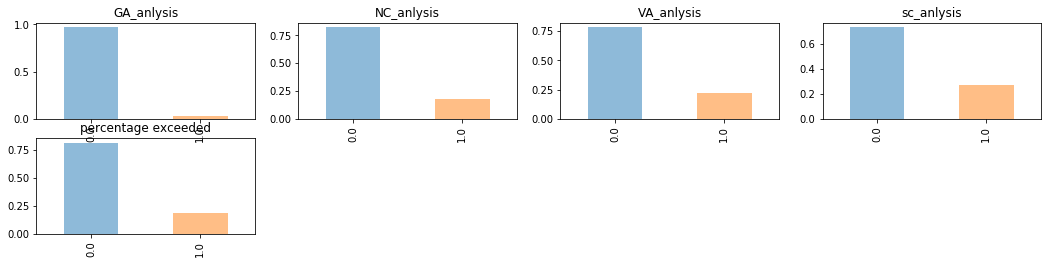

In [28]:
fig=plt.figure(figsize=(18,6))
plt.subplot2grid((3,4),(1,0))
data.speed_exceeded.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("percentage exceeded")

plt.subplot2grid((3,4),(0,1))
data.speed_exceeded[data.state=="NC"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("NC_anlysis")

plt.subplot2grid((3,4),(0,2))
data.speed_exceeded[data.state=="VA"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("VA_anlysis")

plt.subplot2grid((3,4),(0,3))
data.speed_exceeded[data.state=="SC"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("sc_anlysis")

plt.subplot2grid((3,4),(0,0))
data.speed_exceeded[data.state=="GA"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("GA_anlysis")

## This shows that number of drivers who crosses the speed limit can be arranged as follows:
###  State: SC>>VA>>NC>>GA

# Analysis on basis of part of day

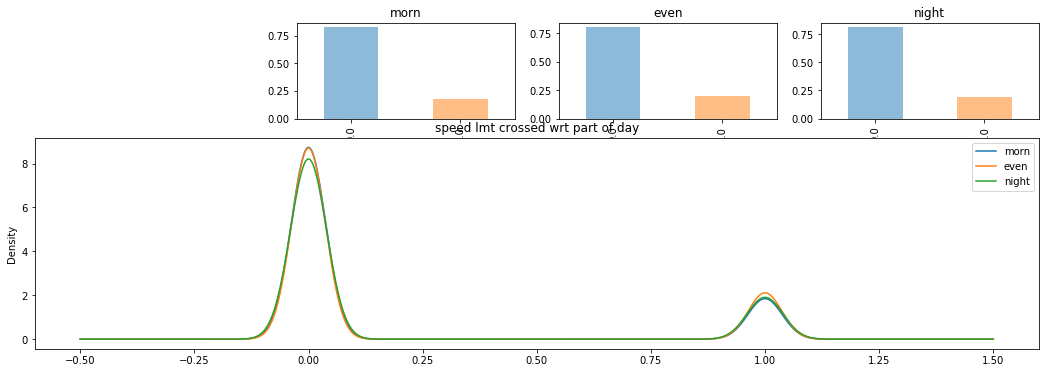

In [29]:
NC_colour="#FA0000"
VA_colour="F9BF00"
SC_coluor="00F981"
GA_colour="8500F9"
fig=plt.figure(figsize=(18,6))

plt.subplot2grid((3,4),(0,1))
data.speed_exceeded[data.part_of_day=="morning"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("morn")

plt.subplot2grid((3,4),(0,2))
data.speed_exceeded[data.part_of_day=="evening"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("even")

plt.subplot2grid((3,4),(0,3))
data.speed_exceeded[data.part_of_day=="night"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("night")

plt.subplot2grid((3,4),(1,0) ,rowspan=3,colspan=4)
for x in ["morning","evening","night"]:
    data.speed_exceeded[data.part_of_day==x].plot(kind="kde")
plt.title("speed lmt crossed wrt part of day")
plt.legend(("morn","even","night"))


### In general number of people crossing limit are more in evening as compared to other part of day.

# Analysis on basis of functionalClass

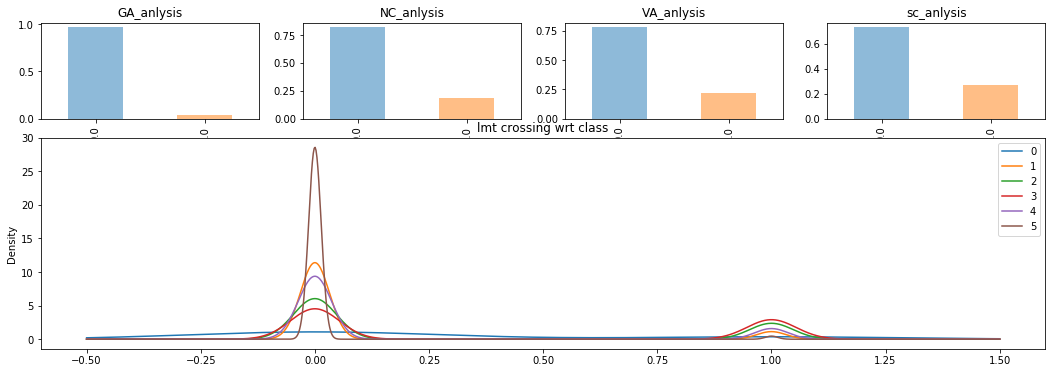

In [30]:
NC_colour="#FA0000"
VA_colour="F9BF00"
SC_coluor="00F981"
GA_colour="8500F9"
fig=plt.figure(figsize=(18,6))
plt.subplot2grid((3,4),(1,0))
data.speed_exceeded.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("percentage exceeded")

plt.subplot2grid((3,4),(0,1))
data.speed_exceeded[data.state=="NC"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("NC_anlysis")

plt.subplot2grid((3,4),(0,2))
data.speed_exceeded[data.state=="VA"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("VA_anlysis")

plt.subplot2grid((3,4),(0,3))
data.speed_exceeded[data.state=="SC"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("sc_anlysis")

plt.subplot2grid((3,4),(0,0))
data.speed_exceeded[data.state=="GA"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("GA_anlysis")

plt.subplot2grid((3,4),(1,0) ,rowspan=3,colspan=4)
for x in [0,1,2,3,4,5]:
    data.speed_exceeded[data.functionalClass==x].plot(kind="kde")
plt.title("lmt crossing wrt class")
plt.legend(("0","1","2","3","4","5"))

## 3,2 and 4 functional class have more no of drivers who cross speed limit

# On basis of controlled acess

Text(0.5,1,'controlled-access----yes')

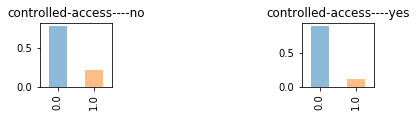

In [67]:
plt.subplot2grid((3,4),(0,0))
data.speed_exceeded[data.controlledAccess=="N"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("controlled-access----no")

plt.subplot2grid((3,4),(0,3))
data.speed_exceeded[data.controlledAccess=="Y"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("controlled-access----yes")

### Roads not having access have more lmt crossers than other

Text(0.5,1,'lmt exceeding plotting for not highways')

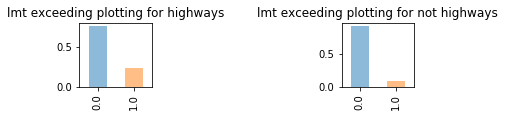

In [24]:
plt.subplot2grid((3,4),(0,0))
data.speed_exceeded[data.isHighway==1].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("lmt exceeding plotting for highways")

plt.subplot2grid((3,4),(0,3))
data.speed_exceeded[data.isHighway==0].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("lmt exceeding plotting for not highways")

### Speed limit is crossed more on highways

In [25]:
data['functionalClass'].value_counts()

4    83983
2    76635
3    62147
5    62068
1    58783
0       12
Name: functionalClass, dtype: int64

### Visualizing Frequency of value in columns

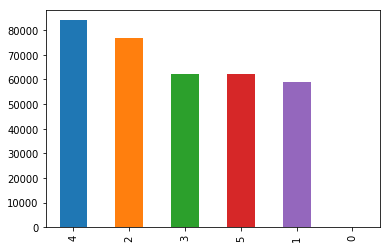

In [43]:
data['functionalClass'].value_counts().plot(kind='bar')

This shows that maximum population lies in 4th functional class

In [50]:
data['state'].value_counts()

NC    298510
VA     31980
SC     12759
GA       379
Name: state, dtype: int64

The above shows population distribution in different states

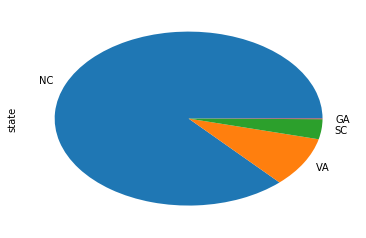

In [49]:
data['state'].value_counts().plot(kind='pie')

In [59]:
data['month'].value_counts()

10    62742
11    57521
6     57249
8     55871
9     55665
7     54580
Name: month, dtype: int64

In [60]:
data['hour'].value_counts()

12    27059
13    25007
14    24525
15    24400
16    23808
18    23128
17    23008
11    22447
19    19979
10    18313
20    17132
21    13354
9     11799
22    10357
23     8188
8      7230
0      7094
1      6207
7      5852
2      5378
6      5066
3      4955
5      4703
4      4639
Name: hour, dtype: int64

In [26]:
data_by_state = data.groupby('state')

In [27]:
data_by_state.head(3)

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,...,speed_exceeded,hour,min,year,month,day,part_of_day,is_morning,is_evening,is_night
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,...,0.0,0,4,2015,6,1,morning,True,,
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,...,0.0,0,4,2015,6,1,morning,True,,
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,...,0.0,0,4,2015,6,1,morning,True,,
197,34.466244,-79.331902,6/1/2015 8:17,52,55,4,N,1,SC,1444,...,0.0,8,17,2015,6,1,morning,True,,
200,36.758896,-76.351028,6/1/2015 8:31,64,60,2,Y,1,VA,88250,...,1.0,8,31,2015,6,1,morning,True,,
208,36.878399,-76.377907,6/1/2015 8:46,28,55,5,N,1,VA,88250,...,0.0,8,46,2015,6,1,morning,True,,
213,34.456764,-79.336540,6/1/2015 8:52,17,55,4,N,1,SC,1444,...,0.0,8,52,2015,6,1,morning,True,,
214,36.886341,-76.341537,6/1/2015 8:54,1,55,5,N,1,VA,88250,...,0.0,8,54,2015,6,1,morning,True,,
541,35.013641,-80.851852,6/1/2015 11:55,43,55,3,N,1,SC,550768,...,0.0,11,55,2015,6,1,morning,True,,
19021,33.530354,-82.014488,6/10/2015 16:29,64,65,1,Y,1,GA,1434981,...,0.0,16,29,2015,6,10,evening,,True,


In [31]:
data_month_state=data.groupby(['month', 'state'])['amt_speed_faster'].count()

In [32]:
data_month_state

month  state
6      GA           5
       NC       10173
       SC         538
       VA         451
7      GA           0
       NC        9900
       SC         494
       VA         497
8      NC        9289
       SC         695
       VA         443
9      GA           5
       NC        8538
       SC         610
       VA        1088
10     NC        8281
       SC         619
       VA        2467
11     GA           3
       NC        7649
       SC         467
       VA        2097
Name: amt_speed_faster, dtype: int64

In [33]:
grouped_data=data.groupby(['month', 'state','part_of_day','functionalClass','isHighway'])['amt_speed_faster'].count()

In [34]:
grouped_data

month  state  part_of_day  functionalClass  isHighway
6      GA     evening      1                1               3
                           4                0               0
                           5                1               0
              morning      3                0               0
                           5                1               0
              night        1                1               2
                           4                0               0
                           5                1               0
       NC     evening      0                0               0
                           1                1             248
                           2                1            1506
                           3                0             233
                                            1            1435
                           4                0             328
                                            1             437
                

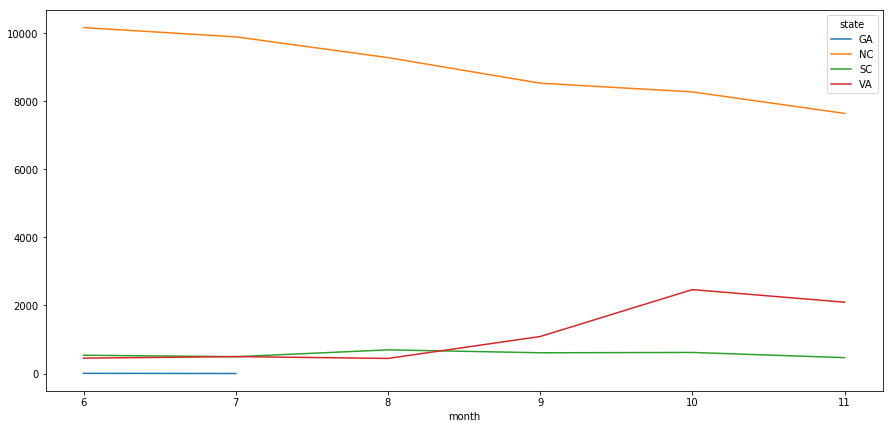

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['month', 'state'])['amt_speed_faster'].count().unstack().plot(ax=ax)

### The above graph shows that 
1. In VA , speed limit is crossed more in month of 9 , 10 and 11 but GA has in 6 to 7th month and not anywhere else
2. Also we can see that from mid of 7th o mid of 8th month state SC have more bad drivers than VA but after that VA have more bad drivers than SC
3. Number of bad drivers decreases in NC as the months increses

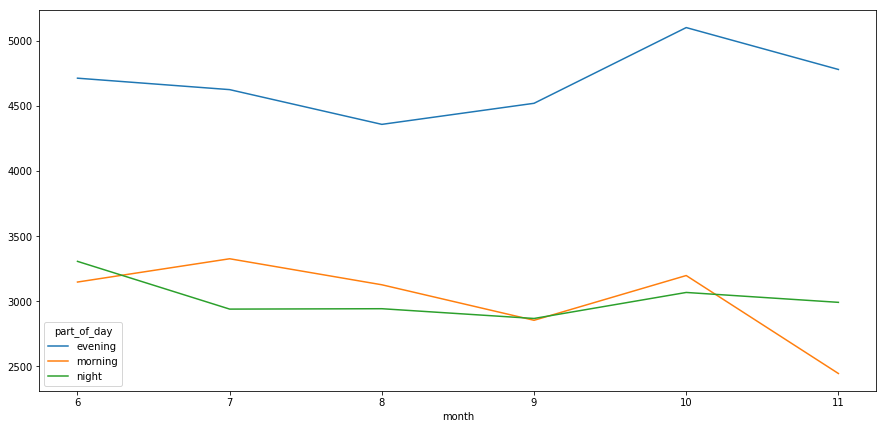

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['month','part_of_day'])['amt_speed_faster'].count().unstack().plot(ax=ax)

## The above graph shows that overall more drivers cross limit in evening than in any other part of day.
### And that in only 10th month more limit is crossed in night than morning

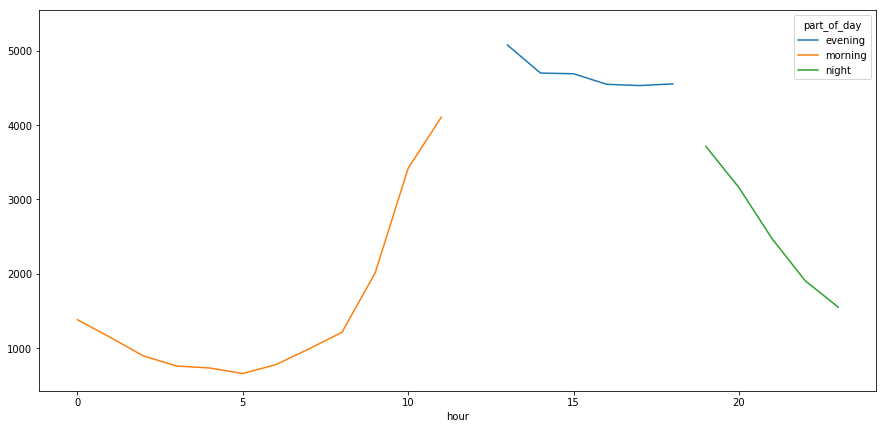

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['hour','part_of_day'])['amt_speed_faster'].count().unstack().plot(ax=ax)

## The above graph shows the relation between hour of day and speed limit crossed

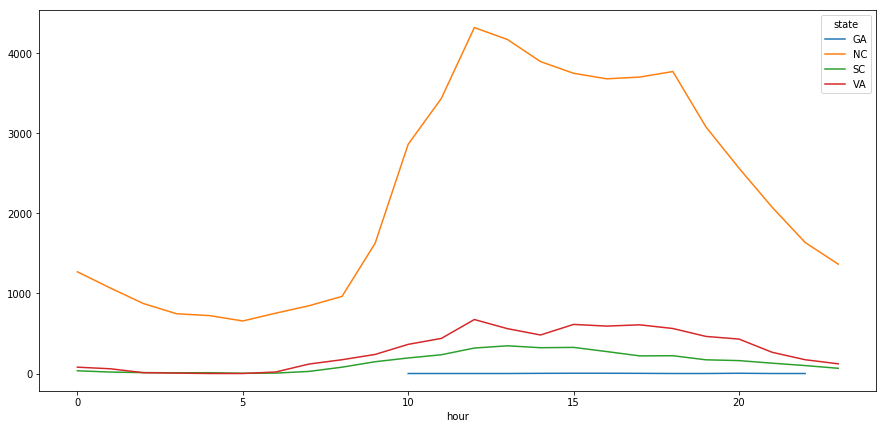

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['hour','state'])['amt_speed_faster'].count().unstack().plot(ax=ax)

## The above graph shows which state wise and hour wise number of drivers who cross the speeed limit
#### There is a sharp increase in number of drivers who cross the speed limit during 7 to 10th hour in all states except GA.

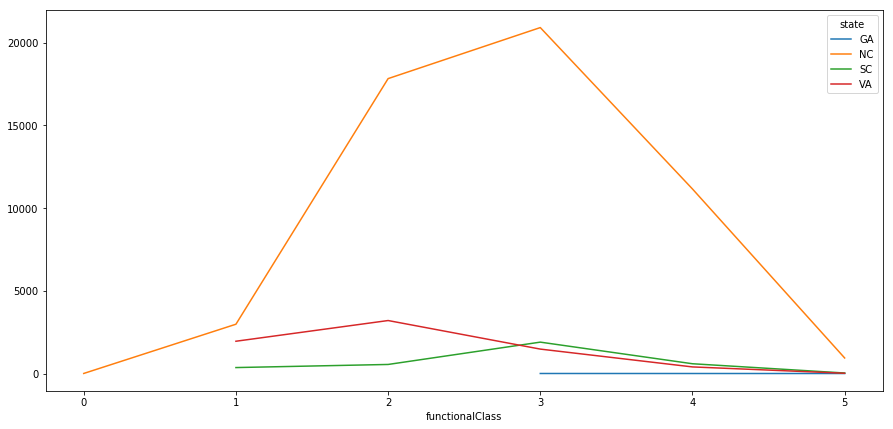

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['functionalClass','state'])['amt_speed_faster'].count().unstack().plot(ax=ax)

1. This shows that for state NC:
   Maximum limit crossed is by functional class 3 and minimum by 0
2. For state VA:
   Maximum limit is crossed by drivers of functional class 2
3. For state GA:
   Maximum lmt is crossed by functional class 3 drivers

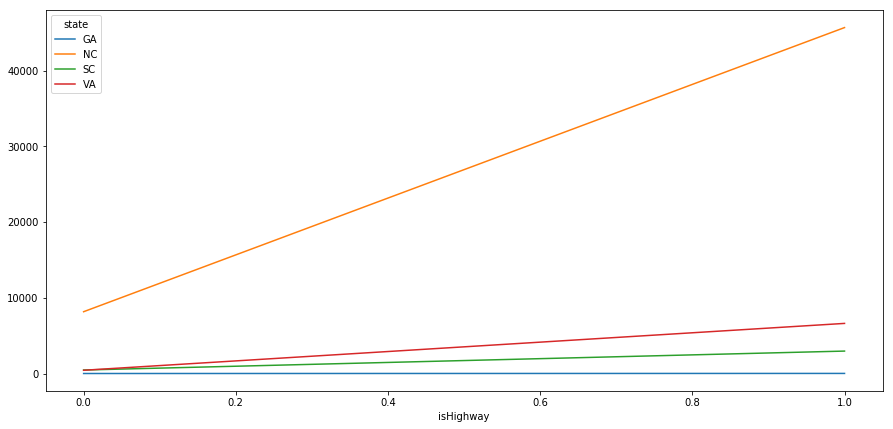

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['isHighway','state'])['amt_speed_faster'].count().unstack().plot(ax=ax)

## The above graph shows that for every state , more number of drivers have crossed the speed limit when driving of higway .


Text(0.5,1,'MONTH WISE ANALYSIS OF NUMBER OF BAD DRIVERS IN EACH FUNCTIONAL CLASS ')

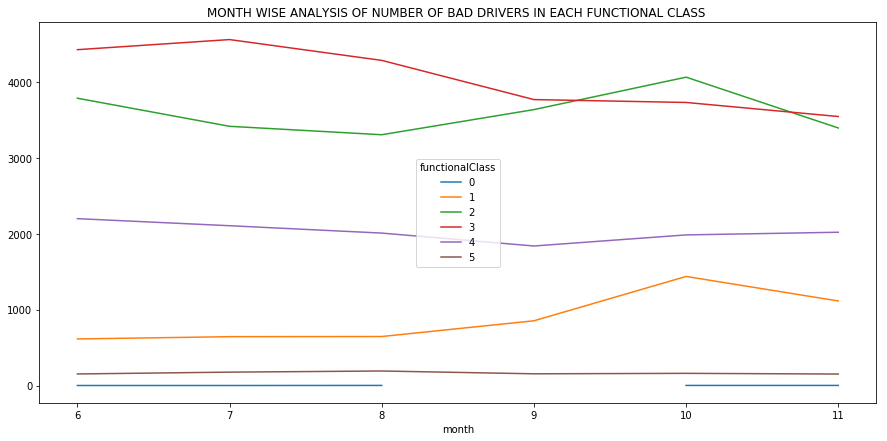

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['month','functionalClass'])['amt_speed_faster'].count().unstack().plot(ax=ax)
plt.title("MONTH WISE ANALYSIS OF NUMBER OF BAD DRIVERS IN EACH FUNCTIONAL CLASS ")

#### The above graph shows that till the mid of 9th month  drivers  of functional class 3 have highest number of bad drivers but after that month drivers of functional class 2 crosses limit highest number of times

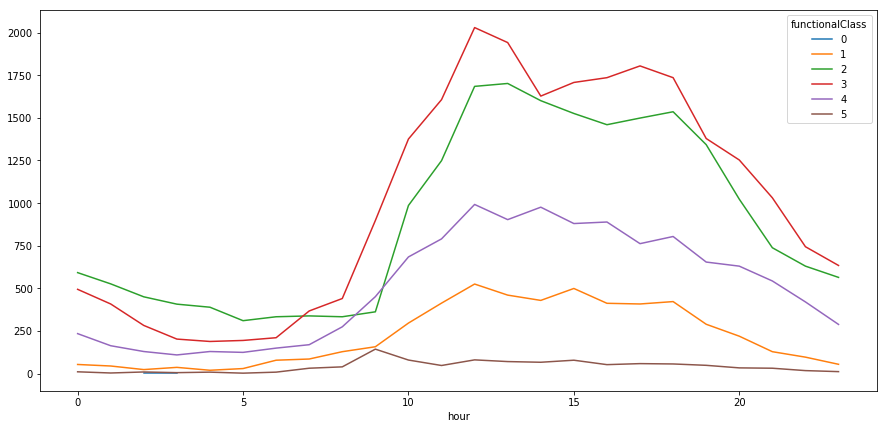

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['hour','functionalClass'])['amt_speed_faster'].count().unstack().plot(ax=ax)

## The above graph shows hourly analysis of number of drivers who cross speed limit wrt each functional class 

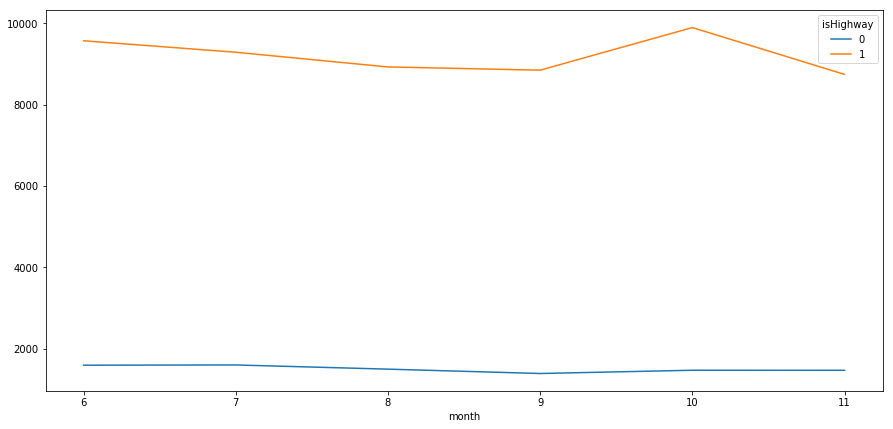

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['month','isHighway'])['amt_speed_faster'].count().unstack().plot(ax=ax)

### By looking  at the above graph we can conclude that in general more speed limit is crossed on highways than anywhere else, also that even on highways most bad month was 10th month. 